In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import os
os.environ["KERAS_BACKEND"] = "torch"
import keras

In [2]:
X = np.concatenate([np.load("data/atm_retr_params_12800_"+str(i)+".npy") for i in range(70)])
y = np.concatenate([np.load("data/atm_retr_data_12800_"+str(i)+".npy") for i in range(70)])

X = X[~np.isnan(y).any(axis=1)]
y = y[~np.isnan(y).any(axis=1)]


y = np.log(y)

#y_means = np.max(y, axis=1)

#y = y / y_means[:, None]

#y = np.hstack((y, np.log(y_means)[:,None]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xscaler = MinMaxScaler()

X_train = xscaler.fit_transform(X_train)
X_test = xscaler.transform(X_test)

yscaler = StandardScaler()

y_train = yscaler.fit_transform(y_train)
y_test = yscaler.transform(y_test)

In [3]:
inp = keras.layers.Input(shape=(y_train.shape[1],))
h = keras.layers.Dense(512, activation="relu")(inp)
h = keras.layers.Dense(256, activation="relu")(h)
h = keras.layers.Dense(128, activation="relu")(h)
h = keras.layers.Dense(32, activation="relu")(h)
h = keras.layers.Dense(128, activation="relu")(h)
h = keras.layers.Dense(256, activation="relu")(h)
h = keras.layers.Dense(512, activation="relu")(h)
out = keras.layers.Dense(y_train.shape[1], activation="linear")(h)

model = keras.models.Model(inputs=inp, outputs=out)

model.compile(optimizer='adam', loss="mean_squared_error")

model.fit(y_train, y_train, epochs=1000, batch_size=1024, validation_data=(y_test, y_test), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - loss: 0.0660 - val_loss: 0.0051
Epoch 2/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 3/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - loss: 0.0011 - val_loss: 8.6932e-04
Epoch 4/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - loss: 0.0023 - val_loss: 7.9789e-04
Epoch 5/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - loss: 9.2652e-04 - val_loss: 0.0018
Epoch 6/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - loss: 0.0011 - val_loss: 6.4871e-04
Epoch 7/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 8/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - loss: 0.0013 - val_loss: 9.1986e-04
Epoch 9/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - loss: 0.0010 - val_loss: 6.8372e-04
Epoch 10/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - loss: 0.0011 - val_loss: 6.4247e-04
Epoch 11/1000
700/700 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - loss: 6.5811

In [4]:
pred = model.predict(y_test)

dy = np.linalg.norm(pred - y_test, axis=1)

q = 0.95

outliers = dy > np.quantile(dy, q)

print(np.quantile(dy, q))


5600/5600 ━━━━━━━━━━━━━━━━━━━━ 5s 926us/step
1.1874784893300743


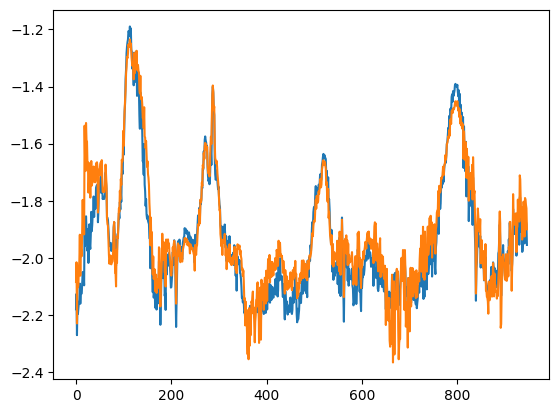

In [5]:
i = np.random.randint(0, y_test[outliers].shape[0])

plt.figure()
plt.plot(y_test[outliers][i])
plt.plot(pred[outliers][i])
plt.show()

In [12]:
pred = model.predict(y_train)

dy = np.linalg.norm(pred - y_train, axis=1)

q = 0.999

outliers = dy > np.quantile(dy, q)

print(np.quantile(dy, q))


22398/22398 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step
7.25850431620036


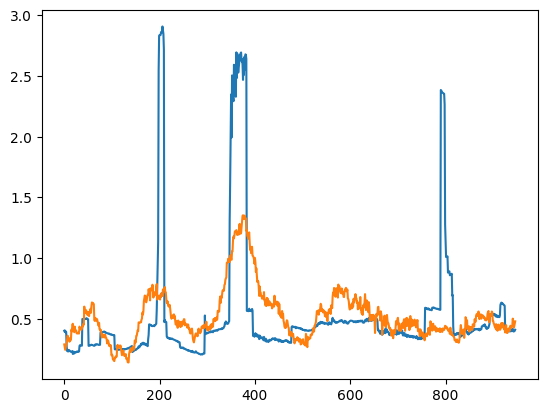

In [19]:
i = np.random.randint(0, y_train[outliers].shape[0])

plt.figure()
plt.plot(y_train[outliers][i])
plt.plot(pred[outliers][i])
plt.show()

In [20]:
y_all = yscaler.transform(y)

pred = model.predict(y_all)


27997/27997 ━━━━━━━━━━━━━━━━━━━━ 27s 958us/step


In [21]:
dy = np.linalg.norm(pred - y_all, axis=1)

q = 0.80

outliers = dy > np.quantile(dy, q)

print(np.quantile(dy, q))

0.4952121549368536


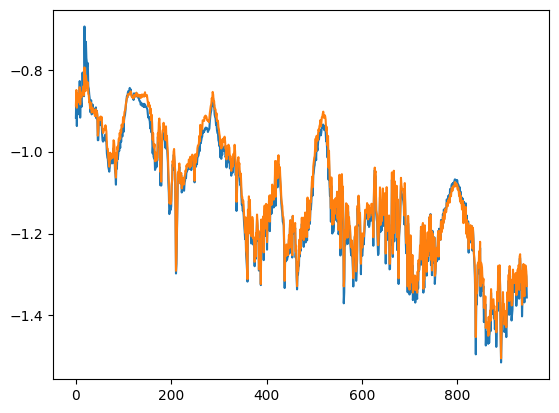

In [25]:
i = np.random.randint(0, y_all[outliers].shape[0])

plt.figure()
plt.plot(y_all[outliers][i])
plt.plot(pred[outliers][i])
plt.show()

In [29]:
dy = np.linalg.norm(pred - y_all, axis=1)

q = 0.80

outliers = dy > np.quantile(dy, q)

np.save("outliers_70_"+str(int(100*q))+".npy", outliers)

: 

In [ ]:
outliers